# SuPy UHI testing January 12 2021

In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night 
from dict_legend import *
from supy_plot import supy_plot
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")
sp.show_version()

SuPy versions
-------------
supy: 2021.1.12 
supy_driver: 2020b10

SYSTEM DEPENDENCY

INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.0.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18362
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2020.5
dateutil         : 2.8.1
pip              : 20.3.3
setuptools       : 51.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.3.3
html5lib         : None
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.11.1
IPython      

In [2]:
# Sample Data
path_runcontrol_s = Path('SuPy/src/supy/sample_run')/ 'RunControl.nml'
df_state_init_s = sp.init_supy(path_runcontrol_s)
grid_s = df_state_init_s.index[0]
df_forcing_s = sp.load_forcing_grid(path_runcontrol_s, grid_s)

# Wisley Data
path_runcontrol_w = Path('SuPy/src/supy/sample_run')/ 'RunControl_wisley.nml'
df_state_init_w = sp.init_supy(path_runcontrol_w)
grid_w = df_state_init_w.index[0]
df_forcing_w = sp.load_forcing_grid(path_runcontrol_w, grid_w)

# Wisley Data
path_runcontrol_wu = Path('SuPy/src/supy/sample_run')/ 'RunControl_wisley_urban.nml'
df_state_init_wu = sp.init_supy(path_runcontrol_wu)
grid_wu = df_state_init_wu.index[0]
df_forcing_wu = sp.load_forcing_grid(path_runcontrol_wu, grid_wu)

sp.check_forcing(df_forcing_s)
sp.check_forcing(df_forcing_w)
sp.check_forcing(df_forcing_w)

2021-01-12 18:15:17,215 - SuPy - INFO - All cache cleared.
2021-01-12 18:15:18,505 - SuPy - INFO - All cache cleared.
2021-01-12 18:15:20,690 - SuPy - INFO - All cache cleared.
2021-01-12 18:15:22,127 - SuPy - INFO - All cache cleared.
2021-01-12 18:15:24,710 - SuPy - INFO - All cache cleared.
2021-01-12 18:15:26,300 - SuPy - INFO - All cache cleared.
2021-01-12 18:15:28,818 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-12 18:15:33,814 - SuPy - INFO - All checks for `df_forcing` passed!
2021-01-12 18:15:33,815 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-12 18:15:38,801 - SuPy - INFO - All checks for `df_forcing` passed!
2021-01-12 18:15:38,802 - SuPy - INFO - SuPy is validating `df_forcing`...
2021-01-12 18:15:43,793 - SuPy - INFO - All checks for `df_forcing` passed!


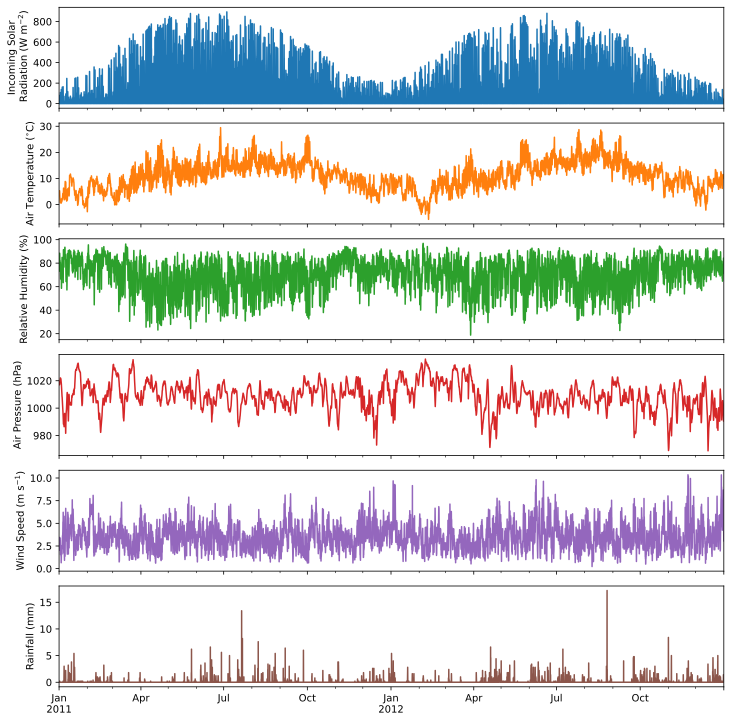

In [3]:
# %% Sample Data Metological Conditions

df_plot_forcing_x = df_forcing_s.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

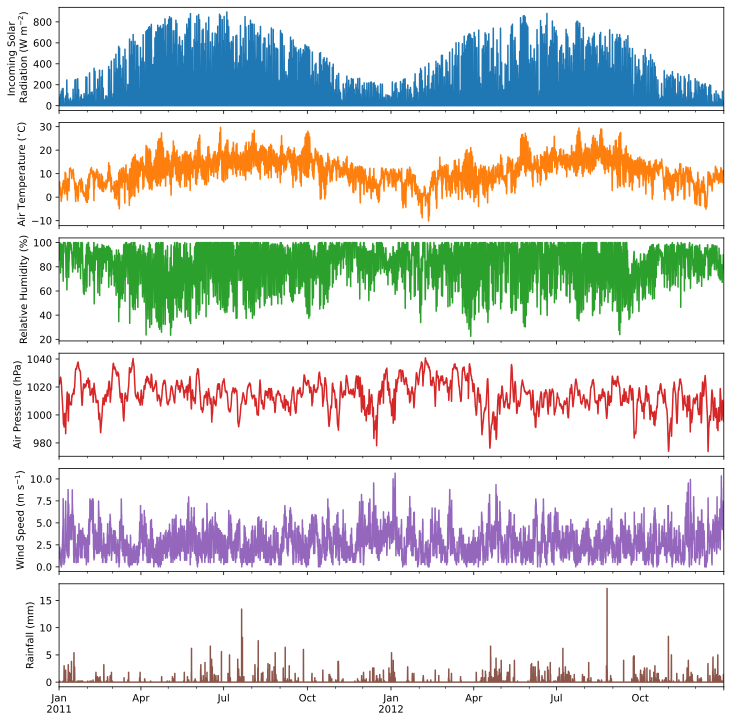

In [4]:
# %% Wisley Metological Conditions

df_plot_forcing_x = df_forcing_w.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

In [5]:
# %% Investigate Metreological conditions for London and Wisley
df_forcing_wi = df_forcing_w.add_suffix('_w')

df_forcing_m = pd.concat([df_forcing_s,df_forcing_wi], axis=1, join='inner')
df_forcing_m = df_forcing_m.rename(columns={'kdown': 'Kdown'})

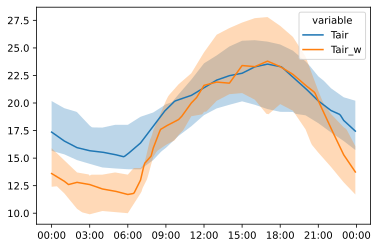

In [6]:
# %% June Tair Sample Data
s = '2012 07 21'
e = '2012 07 29'
ax = sp.util.plot_day_clm(df_forcing_m.loc[s:e,['Tair', 'Tair_w']])

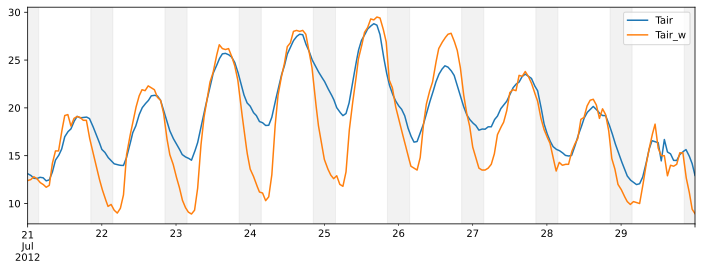

In [7]:
# %% June Tair Wisley Data 
ax_output = df_forcing_m.loc[s:e,['Tair','Tair_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

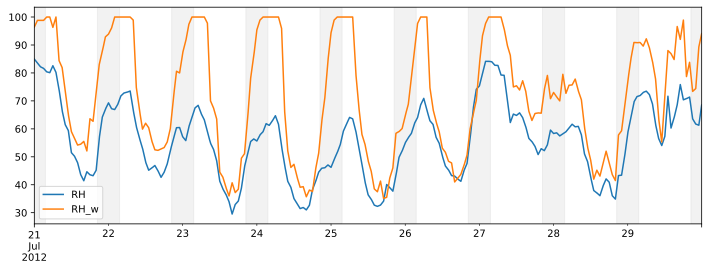

In [8]:
# %%  RH Selected days comparison
ax_output = df_forcing_m.loc[s:e,['RH','RH_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

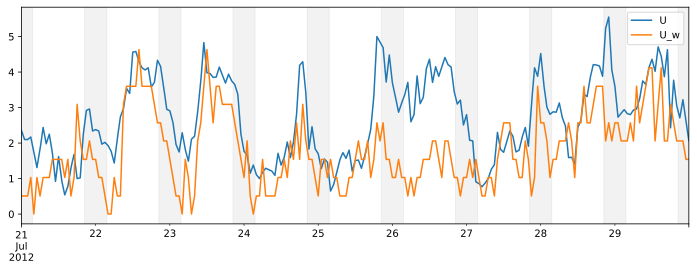

In [9]:
# %%  U Selected days comparison
ax_output = df_forcing_m.loc[s:e,['U','U_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

# Scenarios used 

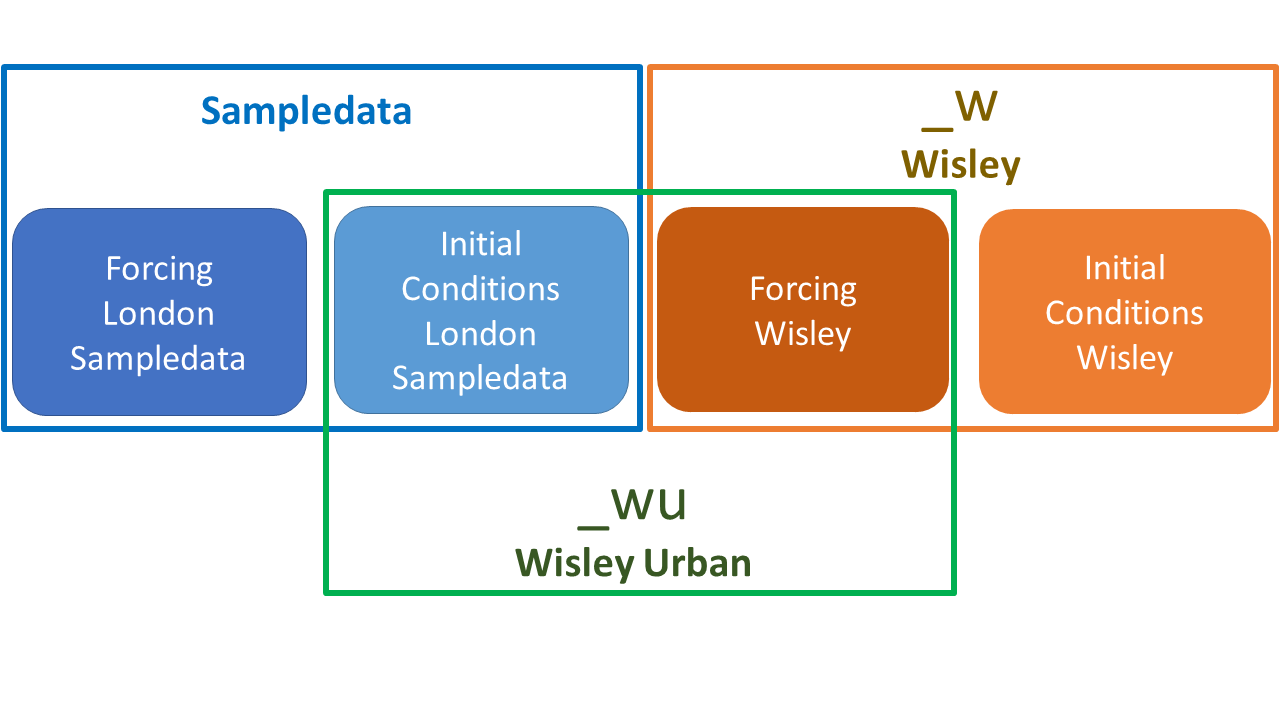

Wisley forcing data obtained from CEDA Archive

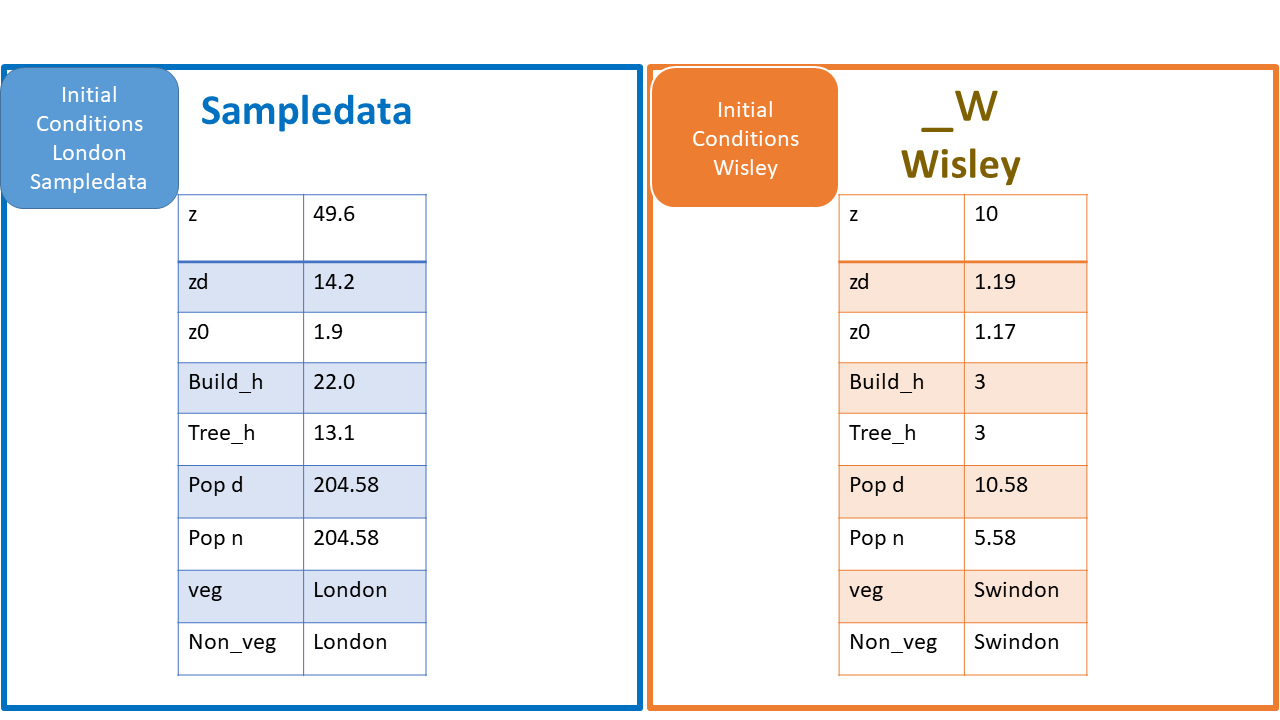

In [10]:
sp.check_state(df_state_init_s)
sp.check_state(df_state_init_w)
sp.check_state(df_state_init_wu)

2021-01-12 18:15:54,104 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-12 18:15:54,287 - SuPy - INFO - All checks for `df_state` passed!
2021-01-12 18:15:54,289 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-12 18:15:54,475 - SuPy - INFO - All checks for `df_state` passed!
2021-01-12 18:15:54,476 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-12 18:15:54,666 - SuPy - INFO - All checks for `df_state` passed!


## Run SuPy

In [11]:

# Run SuPy Sample data conditions
df_output_s, df_state_final_s = sp.run_supy(df_forcing_s, df_state_init_s)
df_output_suews_s = df_output_s['SUEWS']

# Run SuPy with Whisley add _w for recognition later on
df_output_w, df_state_final_w = sp.run_supy(df_forcing_w, df_state_init_w)
df_output_suews_w = df_output_w['SUEWS']
df_output_suews_w = df_output_suews_w.add_suffix('_w')
# 
# Run SuPy with Whisley met data and Sample data initial conditions add _wu for recognition later on
df_output_wu, df_state_final_wu = sp.run_supy(df_forcing_wu, df_state_init_wu)
df_output_suews_wu = df_output_wu['SUEWS']
df_output_suews_wu = df_output_suews_wu.add_suffix('_wu')

2021-01-12 18:15:54,691 - SuPy - INFO - ====================
2021-01-12 18:15:54,692 - SuPy - INFO - Simulation period:
2021-01-12 18:15:54,693 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-12 18:15:54,694 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-12 18:15:54,695 - SuPy - INFO - 
2021-01-12 18:15:54,696 - SuPy - INFO - No. of grids: 1
2021-01-12 18:15:54,697 - SuPy - INFO - SuPy is running in serial mode
2021-01-12 18:16:57,470 - SuPy - INFO - Execution time: 62.8 s
2021-01-12 18:16:57,470 - SuPy - INFO - ====================

2021-01-12 18:16:57,472 - SuPy - INFO - ====================
2021-01-12 18:16:57,473 - SuPy - INFO - Simulation period:
2021-01-12 18:16:57,474 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-12 18:16:57,475 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-12 18:16:57,476 - SuPy - INFO - 
2021-01-12 18:16:57,477 - SuPy - INFO - No. of grids: 1
2021-01-12 18:16:57,478 - SuPy - INFO - SuPy is running in serial mode
2021-01-12 18:18:26,116 - S

In [12]:
# Merge to one dataframe for easier plotting
df_output_suews_g_s  = df_output_suews_s.loc[grid_s]
df_output_suews_g_w  = df_output_suews_w.loc[grid_w]
df_output_suews_g_wu = df_output_suews_wu.loc[grid_wu]

df_merge = pd.concat([df_output_suews_g_s, df_output_suews_g_w,df_output_suews_g_wu],axis=1,join='inner')

# Add possibilites for investigating differences
init_col = list(df_output_suews_s)
w_col = list(df_output_suews_w)
wu_col = list(df_output_suews_wu)

for i, wd, w, wud, wu in zip(init_col,[sub + '_d' for sub in w_col],w_col,[sub + '_d' for sub in wu_col],wu_col):
    df_merge[wd] = df_merge[w] - df_merge[i]
    df_merge[wud] = df_merge[wu] - df_merge[i]

## Diffrences in forcing data, London (Blue) Wisley (Orange)

Rain and Kdown same for both forcing datasets!

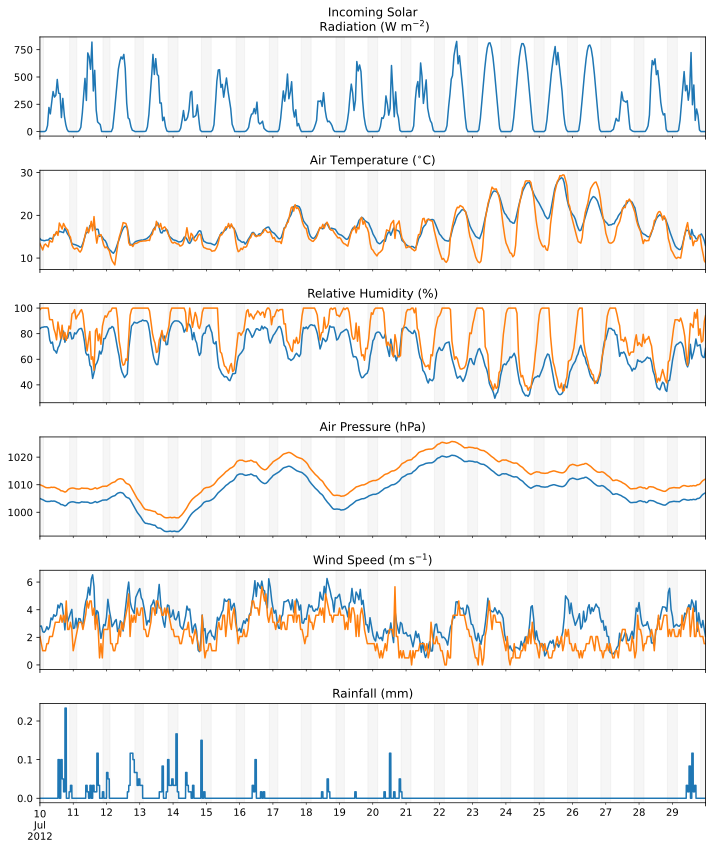

In [13]:
fsize=(10,12)
fig, axes = plt.subplots(6, 1, sharex=True)
s='2012 07 10'
a = df_forcing_m.loc[s : e ,['Kdown']].plot(ax=axes[0],figsize=fsize,title= 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)')
b = df_forcing_m.loc[s : e ,['Tair','Tair_w']].plot(ax=axes[1],figsize=fsize,title='Air Temperature ($^{\circ}}$C)')
c = df_forcing_m.loc[s : e ,['RH','RH_w']].plot(ax=axes[2],figsize=fsize,title='Relative Humidity (%)')
d = df_forcing_m.loc[s : e ,['pres','pres_w']].plot(ax=axes[3],figsize=fsize,title='Air Pressure (hPa)')
e1= df_forcing_m.loc[s : e ,['U','U_w']].plot(ax=axes[4],figsize=fsize,title='Wind Speed (m $\mathrm{s^{-1}}$)')
f = df_forcing_m.loc[s : e ,['rain']].plot(ax=axes[5],figsize=fsize,title='Rainfall (mm)')
for var in [a,b,c,d,e1,f]:
    figsize=fsize
    night(var,df_forcing_m,s,e)
    var.get_legend().remove()
fig.tight_layout()

# Comparison of Fluxes 
 All diffrences are done in comparison to the Sample Data Set
 
 22th - 29th of June 2012 is used as time of comparison

In [14]:
# Start and end date for comparison
s = '2012 07 22'
e = '2012 07 29'

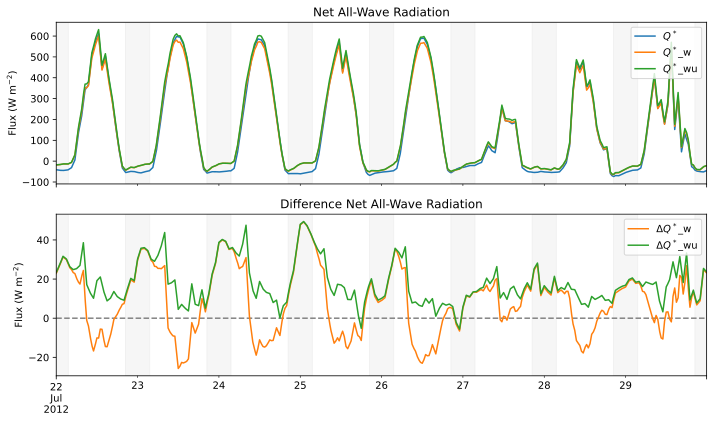

In [15]:
# %% Net All Wave Radiation
var = 'QN'
supy_plot(var, df_merge,s,e,size=(10,6))

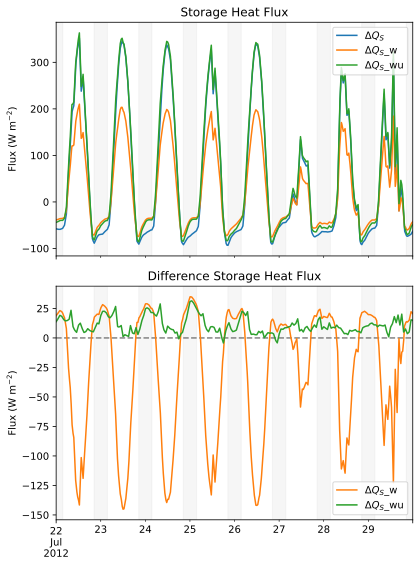

In [16]:
# %% Storage Heat Flux
var = 'QS'
supy_plot(var, df_merge,s,e)

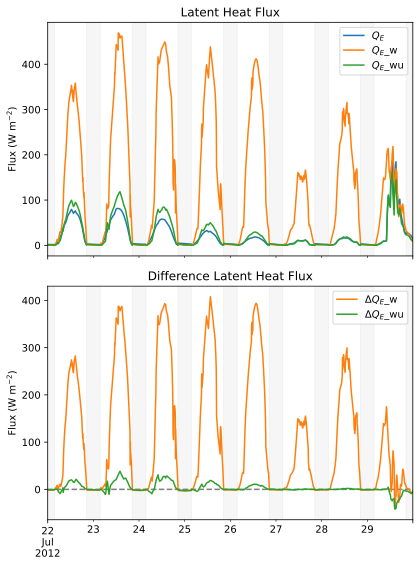

In [17]:
# Latent Heat Flux
var = 'QE'
supy_plot(var, df_merge,s,e)

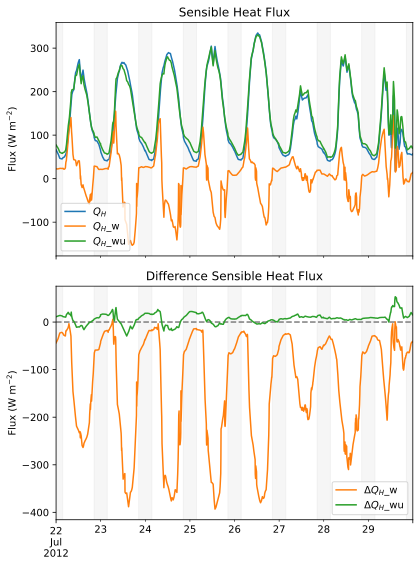

In [18]:
# Sensible Heat Flux
var = 'QH'
supy_plot(var, df_merge,s,e)

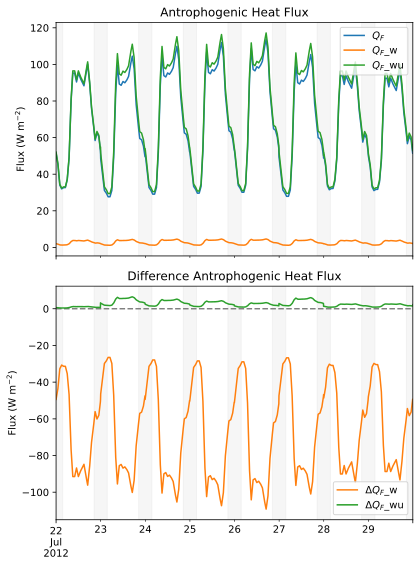

In [19]:
# %%% Anthropogenic Heat flux
supy_plot('QF', df_merge,s,e)

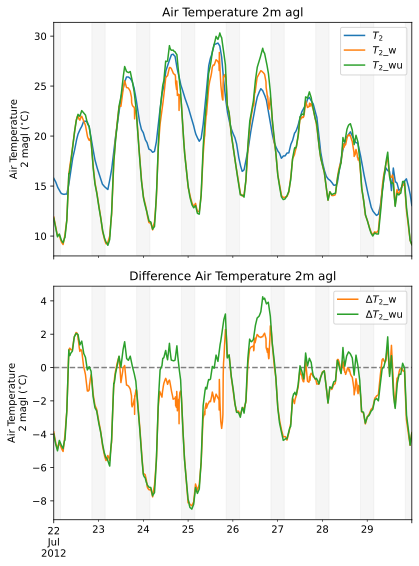

In [20]:
# Air temp 2m
supy_plot('T2', df_merge,s,e)

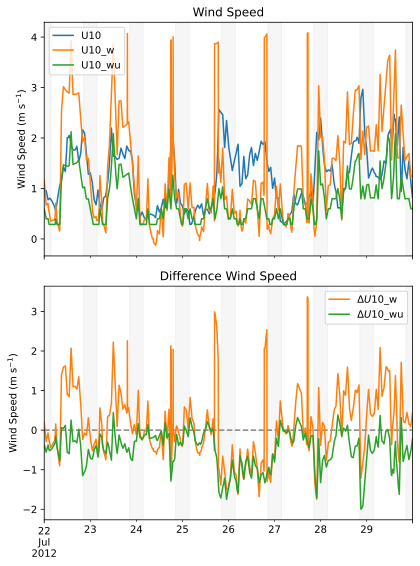

In [21]:
# %% Wind Speed 10m
supy_plot('U10', df_merge,s,e)

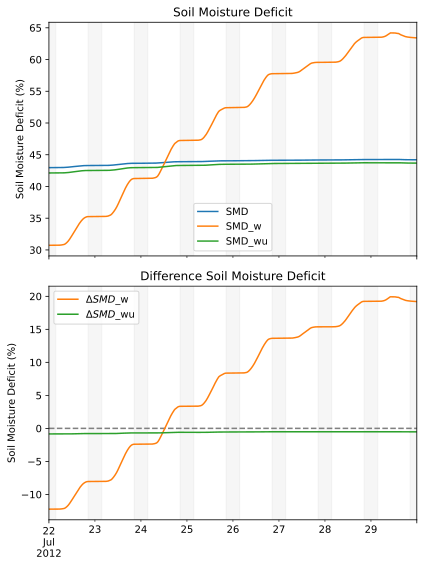

In [22]:
# %% Soil Moisture Deficit
supy_plot('SMD', df_merge,s,e)

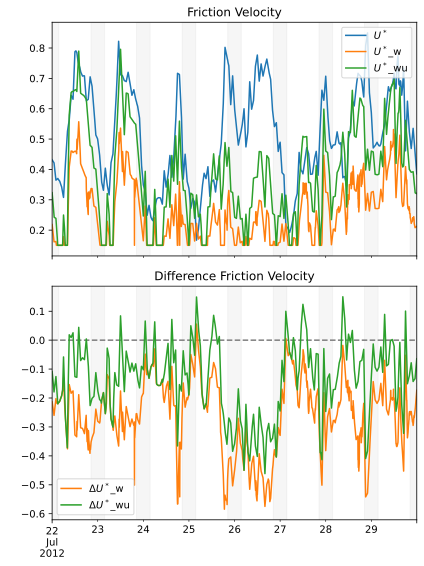

In [23]:
supy_plot('UStar', df_merge,s,e)